# ATOC 5860 Homework 1: Genevieve Clow

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy.stats as stats

# plotting
import matplotlib.pyplot as plt

## 1. c)  
Design your own homework problem to compare two sample means using data of your
own choice. In other words, test whether two sample means are statistically different.
Follow all five steps of hypothesis testing. Hint: See page 26 of Barnes notes for an
example.

### Compare satellite chlor using MODIS and ISCCP clouds 

Hypothesis testing: 
1. State the signicance level: 
- 95% (alpha = 0.05)
2. State the null hypothesis H0 and the alternative H1
- H0 = The global mean of the two chlorophyll samples are equal.
- H1 = The global mean of the two chlorophyll samples are NOT equal.
3. State the statistic to be used, and the assumptions required to use it
- I will use a two-sided t-test. Since I am using annual means, the small sample sizes are small (30). I am assuming that the two samples are drawn from normal distributions with equal standard deviations. 
4. State the critical region
- tcrit = 2.045 (if t > tcrit, reject the null hypothesis)
5. Evaluate the statistic and state the conclusion

In [2]:
# We have 30 years of data for each sample
# N1 = N2 = 30
N = 30 
df = N - 1 
tcrit = stats.t.ppf(0.975,df)
print(tcrit)

2.045229642132703


## Import data

In [3]:
TAREA = xr.open_dataset('/glade/scratch/gclow/archive/b.e22.B1850.f09_g17.cosp_chlor_30yr/ocn/hist/b.e22.B1850.f09_g17.cosp_chlor_30yr.pop.h.nday1.0001-01-01.nc').TAREA

base = '/glade/scratch/gclow/archive/b.e22.B1850.f09_g17.cosp_chlor_30yr/ocn/daily/b.e22.B1850.f09_g17.cosp_chlor_30yr.pop.h.ecosys.nday1.'

data = xr.open_mfdataset(base+'*.nc', concat_dim="time", parallel = True, chunks = {'time':120},
                              data_vars='minimal', compat='override', 
                              coords='minimal')

# Calculate weighted global mean for each year

In [4]:
isccp_global_mean = ((data.totChl_isccp*TAREA).groupby('time.year').sum(dim = ['time','nlat','nlon'])/(data.totChl_isccp_wgt*TAREA).groupby('time.year').sum(dim = ['time','nlat','nlon'])).compute()
modis_global_mean = ((data.totChl_modis*TAREA).groupby('time.year').sum(dim = ['time','nlat','nlon'])/(data.totChl_modis_wgt*TAREA).groupby('time.year').sum(dim = ['time','nlat','nlon'])).compute()

ISCCP Mean: 0.17920853679212384
ISCCP Standard Dev.: 0.006816497004583403


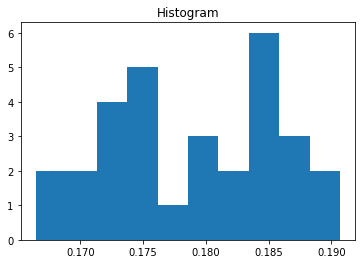

In [5]:
isccp_mean = isccp_global_mean.mean().data
isccp_std = isccp_global_mean.std().data
isccp_var = isccp_global_mean.var().data

print('ISCCP Mean:',isccp_mean)
print('ISCCP Standard Dev.:',isccp_std)
xr.plot.hist(isccp_global_mean);

MODIS Mean: 0.18436608881392358
MODIS Standard Dev.: 0.006701004950137194


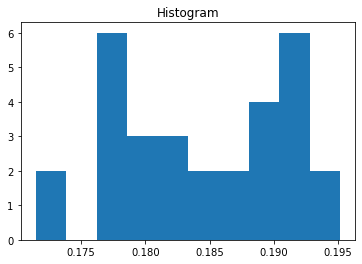

In [6]:
modis_mean = modis_global_mean.mean().data
modis_std = modis_global_mean.std().data
modis_var = modis_global_mean.var().data

print('MODIS Mean:',modis_mean)
print('MODIS Standard Dev.:',modis_std)
xr.plot.hist(modis_global_mean);

In [7]:
sigma = np.sqrt((N*isccp_var + N*modis_var)/(N+N-2))
print(sigma)

0.00687454445218978


**Barnes Eq. 101**

$$ 

t = \frac{\bar{x_{1}} - \bar{x_{2}}{\hat{\sigma}\sqrt{1/N_{1} + 1/N_{2}}} 

\hat{\sigma} = \sqrt{\frac{N_{1}s_{1}^2+N_{2}s_{2}^2}{N_{1}+N_{2}-2}} 

$$

In [8]:
t = (isccp_mean - modis_mean)/(sigma*np.sqrt((1/N)+(1/N)))
print(t)

-2.9056635281870955


In [9]:
abs(t) > tcrit

True

Since t > tcrit, we can reject the null hypothesis. This means that there is a 95% chance that the difference in means did not occur by chance.

## 1. d)

Design your own homework problem to place 95% confidence intervals on the mean
value of a data variable of your choice. Use the non-standardized variable. Hint: See
Barnes notes on Confidence Intervals.

**Barnes Eq. 100** 

$$
\mu = \bar{x} \pm t_{c}\frac{s}{\sqrt{N-1}}
$$

In [10]:
N = 30 
df = N - 1 
tcrit = stats.t.ppf(0.975,df)
print(tcrit)

2.045229642132703


In [11]:
diff = tcrit*(isccp_std/np.sqrt(N-1))

In [12]:
print(round(isccp_mean-diff,3), '<= \u03BC <=', round(isccp_mean+diff,3))

0.177 <= μ <= 0.182


## 1. e)

The F-statistic is used to compare two sample standard deviations. Design your own
homework problem to compare two sample standard deviations and assess if they are
different at the 95% confidence interval. Hint: See page 38 of the Barnes notes. Note:
When calculating the f-statistic Barnes Chapter 1 Equation (122), the larger variance
should always be on top (numerator) and the smaller variance should always be on
bottom (denominator). i.e., F = Larger variance / Smaller variance.

Steps:
1) State significance level. alpha=0.05; 95% confidence
2) Null Hypothesis = The standard deviation for both chlorophyll samples are the same.
3) We will use the f-statistic. We will assume data1 and data2 come from normal populations having the same true variance.
4) Find critical value to exceed to reject the null hypothsis (fcrit)

**Barnes Eq. 122** 

$$
F = \frac{s_{1}^2}{s_{2}^2}
$$

In [13]:
# use 0.975 because this function calculates the lower-tail probability
fcrit = stats.f.ppf(q = 0.975, dfn = N-1, dfd = N-1)
print(fcrit)

2.100995817284212


In [14]:
f = isccp_var/modis_var
print(f)

1.0347671163086183


In [15]:
abs(f) > fcrit

False

We cannot reject our null hypothesis that the two samples have different variances

# Problem 2

## Load data and make exploratory plots

In [16]:
data = pd.read_csv('homework1_data.csv')
data.head()

,P_hPa,R_inches
0,842.63,0.0
1,842.58,0.0
2,842.13,0.0
3,842.38,0.0
4,842.57,0.0


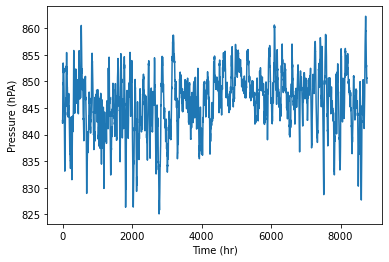

In [47]:
data['P_hPa'].plot()
plt.xlabel('Time (hr)');
plt.ylabel('Pressure (hPA)');

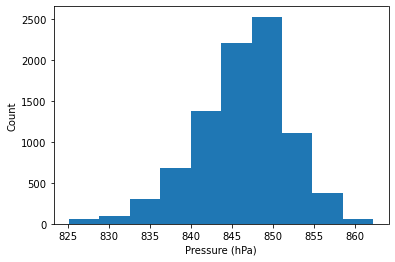

In [48]:
plt.hist(data['P_hPa'])
plt.xlabel('Pressure (hPa)');
plt.ylabel('Count');

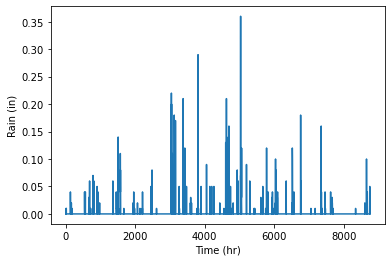

In [46]:
data['R_inches'].plot()
plt.xlabel('Time (hr)');
plt.ylabel('Rain (in)');

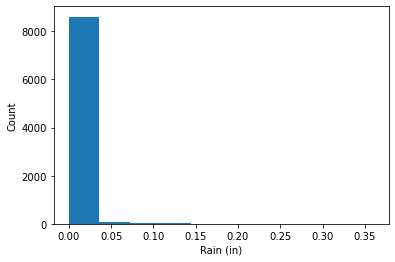

In [45]:
plt.hist(data['R_inches'])
plt.xlabel('Rain (in)');
plt.ylabel('Count');

## 2.a) 

In [21]:
# Average pressure 
data['P_hPa'].mean()

846.3322317351593

In [22]:
# Average pressure when it rained
data_rain = data[data['R_inches']>=0.01].copy()
data_rain['P_hPa'].mean()

847.0306249999999

## 2.b)

**For the t-test:** 

$$
\mu = \bar{x} \pm t_{c}\frac{s}{\sqrt{N-1}}
$$

**For the z-test:** 

$$
\mu = \bar{x} \pm z_{c}\frac{s}{\sqrt{N}}
$$

In [23]:
N = data_rain['P_hPa'].count()
print(N)

384


In [24]:
tcrit = stats.t.ppf(0.975, N-1)
zcrit = stats.norm.ppf(0.975)

In [25]:
# z-stat
low_lim = data_rain['P_hPa'].mean()-zcrit*(data_rain['P_hPa'].std()/np.sqrt(N))
high_lim = data_rain['P_hPa'].mean()+zcrit*(data_rain['P_hPa'].std()/np.sqrt(N))
print('z-stat confidence interval: ', round(low_lim,3), '-', round(high_lim,3))

z-stat confidence interval:  846.492 - 847.569


In [26]:
# t-stat
low_lim = data_rain['P_hPa'].mean()-tcrit*(data_rain['P_hPa'].std()/np.sqrt(N-1))
high_lim = data_rain['P_hPa'].mean()+tcrit*(data_rain['P_hPa'].std()/np.sqrt(N-1))
print('t-stat confidence interval: ', round(low_lim,3), '-', round(high_lim,3))

t-stat confidence interval:  846.489 - 847.572


The mean of all data (846.332) lies outside of the 95% confidence range of the rainy data. The z-statistic and t-statistic are very similar in this case, so I would argue that either would be appropriate. This indicates that we have a large enough sample where sample size doesn't significantly change our results.

However, I suspect that there is high auto-correlation in this dataset, so the true number of independent samples may be lower. 

## 2.c)

In [49]:
N_b = 1000

## initialize array
P_Bootstrap=np.empty((N_b,N))

## loop over to fill in array with randomly selected values
for i in range(N_b):
    P_Bootstrap[i,:]=np.random.choice(data['P_hPa'],N)

In [50]:
## Calculate the means of your randomly selected SWE values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print('Mean:',P_Bootstrap_mean_avg)
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print('Standard Dev:',P_Bootstrap_mean_std)
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print('Min:', P_Bootstrap_mean_min)
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print('Max:', P_Bootstrap_mean_max)

Mean: 846.3339603645834
Standard Dev: 0.279108109245874
Min: 845.4586458333333
Max: 847.1797656250001


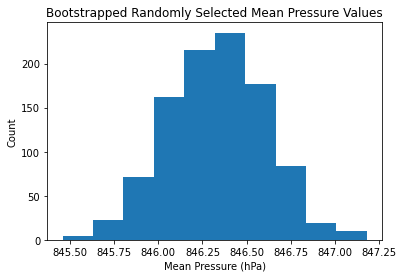

In [57]:
plt.hist(P_Bootstrap_mean)
plt.xlabel('Mean Pressure (hPa)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Pressure Values');

**Barnes eq. 83**

$$
z = \frac{\bar{\chi} - \mu}{\frac{\sigma}{\sqrt{N}}}
$$

where 
- $\bar{\chi}$ = sample mean 
- $\mu$ = population mean 

In [64]:
# sample_N is 1 because we are comparing the sample mean to a distribution of means
sample_N = 1
sample_mean=data_rain['P_hPa'].mean() # rainy days only
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z =(sample_mean-population_mean)/xstd
print(z)

2.4960386758335686


In [66]:
zcrit = stats.norm.ppf(0.975)
print(zcrit)

1.959963984540054


z > zcrit, so we can reject the null hypothesis. This is consistent with what we found previously. 